In [1]:
import pandas as pd
from urllib.request import urlopen  
import os.path as osp
import os
import logging
import zipfile
from glob import glob
logging.getLogger().setLevel('INFO')


import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

## Helpers

In [2]:
def download_file(url_str, path):
    url = urlopen(url_str)
    output = open(path, 'wb')       
    output.write(url.read())
    output.close()  
    
def extract_file(archive_path, target_dir):
    zip_file = zipfile.ZipFile(archive_path, 'r')
    zip_file.extractall(target_dir)
    zip_file.close()

## Download the dataset

In [3]:
BASE_URL = 'http://tennis-data.co.uk'
DATA_DIR = "tennis_data"
ATP_DIR = './{}/ATP'.format(DATA_DIR)
WTA_DIR = './{}/WTA'.format(DATA_DIR)

ATP_URLS = [BASE_URL + "/%i/%i.zip" % (i,i) for i in range(2000,2019)]
WTA_URLS = [BASE_URL + "/%iw/%i.zip" % (i,i) for i in range(2007,2019)]

os.makedirs(osp.join(ATP_DIR, 'archives'), exist_ok=True)
os.makedirs(osp.join(WTA_DIR, 'archives'), exist_ok=True)

for files, directory in ((ATP_URLS, ATP_DIR), (WTA_URLS, WTA_DIR)):
    for dl_path in files:
        logging.info("downloading & extracting file %s", dl_path)
        archive_path = osp.join(directory, 'archives', osp.basename(dl_path))
        download_file(dl_path, archive_path)
        extract_file(archive_path, directory)
    
ATP_FILES = sorted(glob("%s/*.xls*" % ATP_DIR))
WTA_FILES = sorted(glob("%s/*.xls*" % WTA_DIR))

df_atp = pd.concat([pd.read_excel(f) for f in ATP_FILES], ignore_index=True)
df_wta = pd.concat([pd.read_excel(f) for f in WTA_FILES], ignore_index=True)

logging.info("%i matches ATP in df_atp", df_atp.shape[0])
logging.info("%i matches WTA in df_wta", df_wta.shape[0])

INFO:root:downloading & extracting file http://tennis-data.co.uk/2000/2000.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2001/2001.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2002/2002.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2003/2003.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2004/2004.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2005/2005.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2006/2006.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2007/2007.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2008/2008.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2009/2009.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2010/2010.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2011/2011.zip
INFO:root:downloading & extracting file http://tenni

# QUESTIONS

## 1 - Who are the three ATP players with the most wins ?

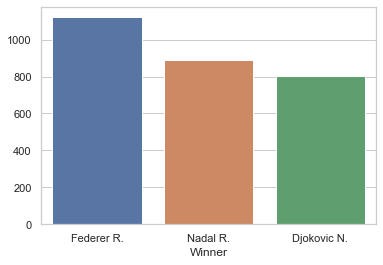

In [4]:
best_players = df_atp.groupby('Winner')['Winner'].count().sort_values(ascending=False,).head(3)
sns.barplot(best_players.index, best_players.values)

## 2 - How many sets did the player “​Federer R.” win in total ?

First, count the number of sets won when Federer is the Winner of the match

In [5]:
fed_winner = df_atp.loc[df_atp['Winner'] == 'Federer R.']['Wsets'].sum(axis = 0, skipna = True)
print(fed_winner)

2546.0


Then, the number of sets won when Federer is the Loser of the match

NB : a quote mark has been forgotten

In [6]:
df_atp.at[18827, 'Lsets'] = 1
fed_loser = df_atp.loc[df_atp['Loser'] == 'Federer R.']['Lsets'].sum(axis = 0, skipna = True)
print(fed_loser)

150.0


So the total number of sets won by Roger Federer is :

In [7]:
print (fed_winner + fed_loser)

2696.0


## 3 - How many sets did the player “​Federer R.” win during the years 2016 and 2017 ?

In [8]:
# Select years 2016 and 2017
df_years = df_atp.loc[(df_atp['Date'].dt.year == 2016.0)| (df_atp['Date'].dt.year == 2017.0)]
fed_winner = df_years.loc[df_years['Winner'] == 'Federer R.']['Wsets'].sum(axis = 0, skipna = True)
fed_loser = df_years.loc[df_years['Loser'] == 'Federer R.']['Lsets'].sum(axis = 0, skipna = True)
print (fed_winner + fed_loser)

182.0


## 4 - For each match, what is the percentage of victories of the winner in the past ?

In [9]:
VicRateW = []
VicRateL = []

for index, row in df_atp.iterrows():
    # select all victories of the Winner
    won = df_atp[:index].loc[df_atp['Winner'] == row['Winner']].shape[0]
    lost = df_atp[:index].loc[df_atp['Loser'] == row['Winner']].shape[0]
    if (won + lost) > 0:
        percentage = won / (won + lost)
    else:
        percentage = 0
    VicRateW.append(percentage)
    print(index, row['Winner'], " : Victory's rate :", percentage)

    # select all victories of the Loser
    won = df_atp[:index].loc[df_atp['Winner'] == row['Loser']].shape[0]
    lost = df_atp[:index].loc[df_atp['Loser'] == row['Loser']].shape[0]
    if (won + lost) > 0:
        percentage = won / (won + lost)
    else:
        percentage = 0
    VicRateL.append(percentage)

df_atp['VicRateW'] = VicRateW
df_atp['VicRateL'] = VicRateL

-Aliassime F.  : Victory's rate : 0.38461538461538464
51938 Ebden M.  : Victory's rate : 0.375
51939 Fritz T.  : Victory's rate : 0.4842105263157895
51940 Fognini F.  : Victory's rate : 0.524822695035461
51941 Querrey S.  : Victory's rate : 0.5586206896551724
51942 Fognini F.  : Victory's rate : 0.5256637168141592
51943 Fritz T.  : Victory's rate : 0.4895833333333333
51944 Sousa J.  : Victory's rate : 0.46474358974358976
51945 Tomic B.  : Victory's rate : 0.49221183800623053
51946 Fognini F.  : Victory's rate : 0.5265017667844523
51947 Tomic B.  : Victory's rate : 0.4937888198757764
51948 Tomic B.  : Victory's rate : 0.4953560371517028
51949 Troicki V.  : Victory's rate : 0.5177865612648221
51950 Herbert P.H.  : Victory's rate : 0.41414141414141414
51951 Nishioka Y.  : Victory's rate : 0.4067796610169492
51952 Norrie C.  : Victory's rate : 0.48484848484848486
51953 Ramos-Vinolas A.  : Victory's rate : 0.4660633484162896
51954 Shapovalov D.  : Victory's rate : 0.5428571428571428
51955 R

# TENNIS MATCH PREDICTIONS

## 1 - Data preparation process

In [10]:
df_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52298 entries, 0 to 52297
Data columns (total 56 columns):
ATP           52298 non-null int64
AvgL          22745 non-null float64
AvgW          22745 non-null float64
B&WL          1097 non-null float64
B&WW          1097 non-null float64
B365L         43666 non-null float64
B365W         43643 non-null float64
Best of       52298 non-null int64
CBL           17506 non-null float64
CBW           17506 non-null float64
Comment       52298 non-null object
Court         52298 non-null object
Date          52298 non-null datetime64[ns]
EXL           39416 non-null float64
EXW           39411 non-null object
GBL           5055 non-null float64
GBW           5055 non-null float64
IWL           13358 non-null float64
IWW           13358 non-null float64
L1            52037 non-null float64
L2            51527 non-null object
L3            24168 non-null object
L4            4731 non-null float64
L5            1791 non-null float64
LBL        

We only use years 2000 to 2016 for the training and year 2017 for the test.

In [11]:
df_atp = df_atp.loc[df_atp['Date'].dt.year <= 2017.0]

We want to predict the output of a match before it starts, so we can't use all data about what happened in the match 

In addition, the ATP number is just an incrementation of the competitions, so it's useless

In [12]:
drop_column = ['L1', 'L2', 'L3', 'L4', 'L5', 'W1', 'W2', 'W3', 'W4', 'W5', 'Lsets', 'Wsets', 'Comment', 'ATP']
df_atp.drop(drop_column, axis=1, inplace = True)

Now we want to fill the missing values

In [13]:
print(df_atp.isnull().sum())

AvgL          29552
AvgW          29552
B&WL          48566
B&WW          48566
B365L          8619
B365W          8642
Best of           0
CBL           32157
CBW           32157
Court             0
Date              0
EXL           12863
EXW           12868
GBL           44608
GBW           44608
IWL           36305
IWW           36305
LBL           23681
LBW           23692
LPts          16262
LRank            77
Location          0
Loser             0
MaxL          29552
MaxW          29552
PSL           14939
PSW           14939
Round             0
SBL           44239
SBW           44239
SJL           34084
SJW           34091
Series            0
Surface           0
Tournament        0
UBL           38992
UBW           38992
WPts          16204
WRank            15
Winner            0
VicRateW          0
VicRateL          0
dtype: int64


We just keep Exeptk that has the most complete set of odds and we fill missing values with 2

In [14]:
bookMakers = ['AvgL', 'AvgW', 'B&WL', 'B&WW', 'B365L', 'B365W', 'CBL', 'CBW','GBL', 'GBW', 'IWL', 'IWW', 'LBL', 'LBW', 'PSL', 'PSW', 'SBL', 'SBW', 'SJL', 'SJW', 'UBL', 'UBW'] # EXL EXW MaxL MaxW

df_bookMakers = df_atp[bookMakers]
df_atp = df_atp.drop(bookMakers, axis=1)

Replace 'NR' values by NaN to be able to calculate the mean

In [15]:
df_atp.loc[df_atp['LRank'] == 'NR', ['LRank']] = np.nan
df_atp.loc[df_atp['WRank'] == 'NR', ['WRank']] = np.nan

EXW souldn't be an object, so we check the reason and fix it

In [16]:
print(df_atp.EXW.unique())

[nan 1.48 1.2 1.5 1.8 1.9 1.75 1.65 1.55 2.45 3.12 2.67 2.1 2.15 1.28 2.0
 2.6 1.7 1.85 2.3 2.71 1.45 1.15 1.17 1.71 1.42 2.53 1.6 1.3 1.23 1.25 1.4
 2.85 1.1 1.35 1.95 3.1 4.25 2.31 2.35 2.92 1.11 3.46 1.05 2.05 2.2 7.25
 1.37 1.67 3.98 1.14 3.35 3.81 2.75 1.18 3.75 1.78 1.02 1.22 2.56 2.34
 1.44 1.07 1.32 1.21 2.25 1.04 1.06 1.13 2.17 1.26 1.53 2.83 1.19 4.67
 1.27 1.47 2.28 2.65 1.03 1.39 2.4 1.49 3.0 1.76 1.58 1.36 1.63 1.34 5.2
 1.33 3.22 2.03 3.05 6.75 4.06 2.9 5.15 1.12 2.5 2.8 1.81 1.08 3.01 1.38
 1.24 6.25 5.85 3.45 2.12 1.91 1.56 1.99 1.87 1.43 2.7 7.19 7.79 3.89 5.84
 1.51 2.72 2.07 1.16 3.63 1.61 1.97 1.09 1.46 3.6 1.83 3.4 3.17 2.08 5.5
 7.75 2.46 3.59 2.38 1.64 2.63 3.72 1.41 1.571 1.93 8.5 2.23 1.77 0.0 4.92
 1.01 1.54 3.34 2.62 5.9 3.3 6.68 2.55 1.68 2.88 1.115 1.72 4.4 1.415 2.87
 2.82 3.74 2.79 3.37 1.73 1.005 1.57 3.595 2.29 1.66 2.21 10.5 1.62 5.34
 3.9 2.93 1.31 3.15 5.05 1.96 1.92 6.23 9.48 9.25 4.35 3.8 2.525 1.89 3.2
 3.28 3.07 5.66 1.375 4.45 4.9 2.97 4.85 2.37

In [17]:
df_atp[df_atp.eq('2.,3').any(1)]
df_atp.at[38294, 'EXW'] = 2

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
/Users/gabrieldrai/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [18]:
print(df_atp.EXW.unique())

[nan 1.48 1.2 1.5 1.8 1.9 1.75 1.65 1.55 2.45 3.12 2.67 2.1 2.15 1.28 2.0
 2.6 1.7 1.85 2.3 2.71 1.45 1.15 1.17 1.71 1.42 2.53 1.6 1.3 1.23 1.25 1.4
 2.85 1.1 1.35 1.95 3.1 4.25 2.31 2.35 2.92 1.11 3.46 1.05 2.05 2.2 7.25
 1.37 1.67 3.98 1.14 3.35 3.81 2.75 1.18 3.75 1.78 1.02 1.22 2.56 2.34
 1.44 1.07 1.32 1.21 2.25 1.04 1.06 1.13 2.17 1.26 1.53 2.83 1.19 4.67
 1.27 1.47 2.28 2.65 1.03 1.39 2.4 1.49 3.0 1.76 1.58 1.36 1.63 1.34 5.2
 1.33 3.22 2.03 3.05 6.75 4.06 2.9 5.15 1.12 2.5 2.8 1.81 1.08 3.01 1.38
 1.24 6.25 5.85 3.45 2.12 1.91 1.56 1.99 1.87 1.43 2.7 7.19 7.79 3.89 5.84
 1.51 2.72 2.07 1.16 3.63 1.61 1.97 1.09 1.46 3.6 1.83 3.4 3.17 2.08 5.5
 7.75 2.46 3.59 2.38 1.64 2.63 3.72 1.41 1.571 1.93 8.5 2.23 1.77 0.0 4.92
 1.01 1.54 3.34 2.62 5.9 3.3 6.68 2.55 1.68 2.88 1.115 1.72 4.4 1.415 2.87
 2.82 3.74 2.79 3.37 1.73 1.005 1.57 3.595 2.29 1.66 2.21 10.5 1.62 5.34
 3.9 2.93 1.31 3.15 5.05 1.96 1.92 6.23 9.48 9.25 4.35 3.8 2.525 1.89 3.2
 3.28 3.07 5.66 1.375 4.45 4.9 2.97 4.85 2.37

Replace missing values by mean

In [19]:
df_atp['LPts'] = df_atp['LPts'].fillna(df_atp['LPts'].mean())
df_atp['WPts'] = df_atp['WPts'].fillna(df_atp['WPts'].mean())
df_atp['LRank'] = df_atp['LRank'].fillna(df_atp['LRank'].mean())
df_atp['WRank'] = df_atp['WRank'].fillna(df_atp['WRank'].mean())
df_atp['EXL'] = df_atp['EXL'].fillna(2)
df_atp['EXW'] = df_atp['EXW'].fillna(2)

Check again the missing values

In [20]:
print(df_atp.isnull().sum())

Best of           0
Court             0
Date              0
EXL               0
EXW               0
LPts              0
LRank             0
Location          0
Loser             0
MaxL          29552
MaxW          29552
Round             0
Series            0
Surface           0
Tournament        0
WPts              0
WRank             0
Winner            0
VicRateW          0
VicRateL          0
dtype: int64


Replace Winner and Loser data by randomly chosen Player_A Player_B

In [21]:
# To get a binary ouput, 1 if Player_A wins or 0 if Player_B wins
df_atp['Awins'] = np.random.randint(0, 2, df_atp.shape[0])

PlayerA = []
PlayerB = []

# RankDiff is the difference of ranks between player A and player B 
RankDiff = []

# PtsDiff is the difference of points between player A and player B 
PtsDiff = []

# VicRateDiff is the difference of Victory Rate between player A and player B 
VicRateDiff = []

EXA = []
EXB = []

ABestOdd = []
BBestOdd = []

for index, row in df_atp.iterrows():
    if row['Awins'] == 1:
        PlayerA.append(row['Winner'])
        PlayerB.append(row['Loser'])
        RankDiff.append(row['WRank'] - row['LRank'])
        PtsDiff.append(row['WPts'] - row['LPts'])
        VicRateDiff.append(row['VicRateW'] - row['VicRateL'])
        EXA.append(row['EXW'])
        EXB.append(row['EXL'])
        ABestOdd.append(row['MaxW'])
        BBestOdd.append(row['MaxL'])
    else:
        PlayerA.append(row['Loser'])
        PlayerB.append(row['Winner'])
        RankDiff.append(row['LRank'] - row['WRank'])
        PtsDiff.append(row['LPts'] - row['WPts'])
        VicRateDiff.append(row['VicRateL'] - row['VicRateW'])
        EXA.append(row['EXL'])
        EXB.append(row['EXW'])
        ABestOdd.append(row['MaxL'])
        BBestOdd.append(row['MaxW'])

df_atp['PlayerA'] = PlayerA
df_atp['PlayerB'] = PlayerB
df_atp['RankDiff'] = RankDiff
df_atp['PtsDiff'] = PtsDiff
df_atp['VicRateDiff'] = VicRateDiff
df_atp['EXA'] = EXA
df_atp['EXB'] = EXB

drop_column = ['Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts', 'EXL', 'EXW', 'VicRateW', 'VicRateL', 'MaxW', 'MaxL']

df_atp = df_atp.drop(drop_column, axis=1)

df_atp.sample(10)

,Best of,Court,Date,Location,Round,Series,Surface,Tournament,Awins,PlayerA,PlayerB,RankDiff,PtsDiff,VicRateDiff,EXA,EXB
37182,3,Outdoor,2013-03-09,Indian Wells,1st Round,Masters 1000,Hard,BNP Paribas Open,1,Fognini F.,Bedene A.,-41.0,420.00000,-0.022614,1.8,1.95
12192,3,Outdoor,2004-03-04,Acapulco,2nd Round,International Gold,Clay,Abierto Mexicano,1,Hernandez O.,Horna L.,27.0,798.33608,-0.012605,2.6,1.45
8849,3,Outdoor,2002-12-30,Doha,1st Round,International,Hard,Qatar Exxon Mobil Open,1,Youzhny M.,Sanchez D.,-28.0,798.33608,0.101882,2.0,2.00
48647,5,Outdoor,2017-07-06,London,2nd Round,Grand Slam,Grass,Wimbledon,0,Lajovic D.,Federer R.,74.0,-4604.00000,-0.401209,11.5,1.01
31108,3,Indoor,2010-10-25,Vienna,1st Round,ATP250,Hard,BA-CA Tennis Trophy,0,Riba P.,Hajek J.,-16.0,70.00000,0.104167,2.0,2.00
7538,5,Outdoor,2002-06-24,London,2nd Round,Grand Slam,Grass,Wimbledon,0,Gaudio G.,Youzhny M.,-33.0,-798.33608,0.090946,2.0,2.00
2537,3,Outdoor,2000-10-09,Tokyo,1st Round,International Gold,Hard,Japan Open,1,Sa A.,Calatrava A.,31.0,798.33608,-0.314286,2.0,2.00
3445,3,Indoor,2001-02-19,Memphis,1st Round,International Gold,Hard,Kroger St. Jude,1,Woodruff C.,Huet S.,-50.0,798.33608,0.227053,2.0,2.00
32035,3,Outdoor,2011-03-26,Miami,2nd Round,Masters 1000,Hard,Sony Ericsson Open,0,Kohlschreiber P.,Del Potro J.M.,-19.0,300.00000,-0.136727,4.0,1.20
3884,3,Outdoor,2001-04-16,Monte Carlo,1st Round,Masters,Clay,Monte Carlo Masters,1,Arazi H.,Puerta M.,-1.0,798.33608,-0.107293,2.0,2.00


In [22]:
df_atp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49663 entries, 0 to 49662
Data columns (total 16 columns):
Best of        49663 non-null int64
Court          49663 non-null object
Date           49663 non-null datetime64[ns]
Location       49663 non-null object
Round          49663 non-null object
Series         49663 non-null object
Surface        49663 non-null object
Tournament     49663 non-null object
Awins          49663 non-null int64
PlayerA        49663 non-null object
PlayerB        49663 non-null object
RankDiff       49663 non-null float64
PtsDiff        49663 non-null float64
VicRateDiff    49663 non-null float64
EXA            49663 non-null float64
EXB            49663 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2), object(8)
memory usage: 7.7+ MB


## modeling phase

The function to calculate accuracy

In [23]:
def accuracy(predictions, true):
    for i in range(len(predictions)):
        if predictions[i] > 0.5:
            predictions[i] = 1
        else:
            predictions[i] = 0


    count = 0
    lenght = len(true)

    for i in range(lenght):
        if true[i] == predictions[i]:
            count += 1
    return count / lenght

We split the data and get dummies values of categorical values

In [24]:
df = pd.get_dummies(df_atp)
df_atp_train = df.loc[df['Date'].dt.year <= 2016.0]
df_atp_test = df.loc[df['Date'].dt.year == 2017.0]

Y_train = df_atp_train['Awins']
Y_test = df_atp_test['Awins']

df_atp_train = df_atp_train.drop(['Awins', 'Date'], axis=1)
df_atp_test = df_atp_test.drop(['Awins', 'Date'], axis=1)

X_train = pd.get_dummies(df_atp_train)
X_test = pd.get_dummies(df_atp_test)

true = pd.Series(Y_test).values

### RandomForest
NB: I've also tested XGBoost, it gaves the same accuracy than the RandomForest model but takes twice the time to be fitted

In [32]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = [1, 2, 4, 8]

best_accuracy = 0
best_estimator = 0
best_depth = 0

for estimator in n_estimators:
    model = RandomForestRegressor(n_estimators=estimator, max_depth= 5,random_state=1, verbose=2)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)

    acc = accuracy(predictions, true)
    print("The accuracy for", estimator, " trees is:", acc)
    if acc > best_accuracy:
        best_accuracy = acc
        best_estimator = estimator


n_max_depth = range(1,8)
best_accuracy = 0
for i in n_max_depth:
    model = RandomForestRegressor(n_estimators=best_estimator, max_depth= i,random_state=1, verbose=2)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)

    acc = accuracy(predictions, true)
    print("The accuracy for", best_estimator, "trees and", i, "as max_depth is:", acc)
    if acc > best_accuracy:
        best_accuracy = acc
        best_depth = i

model = RandomForestRegressor(n_estimators=best_estimator, max_depth=best_depth,random_state=1, verbose=2)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

acc = accuracy(predictions, true)
print("The best accuracy for", best_estimator, " trees and", best_depth, "ma_depth is:", acc)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 1
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
The accuracy for 1  trees is: 0.6724857685009488
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 2
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
building tree 2 of 2
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out

## Evaluation of the model

### matrice confusion function https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [33]:
from sklearn import metrics

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[878 418]
 [433 906]]


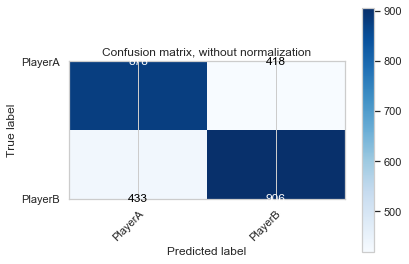

In [34]:
class_names = ['PlayerA', 'PlayerB']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(true, predictions, classes=class_names,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[0.68 0.32]
 [0.32 0.68]]


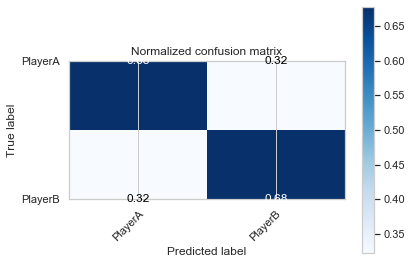

In [35]:
# Plot normalized confusion matrix
plot_confusion_matrix(true, predictions, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

# Bonus : IS THIS MODEL PROFITABLE ?

First, we select the values only up to 0.9 and below 0.1 to raise the accuracy 

In [36]:
predictions = model.predict(X_test)

severe_pred = {}
severe_true = {}

for i in range(len(predictions)):
        if predictions[i] > 0.9:
            severe_pred[i] = 1
            severe_true[i] = true[i]
        elif predictions[i] < 0.1:
            severe_pred[i] = 0
            severe_true[i] = true[i]

shared_items = {k: severe_pred[k] for k in severe_pred if k in severe_true and severe_pred[k] == severe_true[k]}

print("The new accuracy is:", len(shared_items) / len(severe_pred))

The new accuracy is: 0.9227467811158798
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


We make bet on the predicted winner and calcule the Esperance 

In [37]:
df_odds = pd.DataFrame({'Date':df_atp.Date, 'ABestOdd':ABestOdd, 'BBestOdd':BBestOdd})
df_odds = df_odds.loc[df_odds['Date'].dt.year == 2017.0]

count = 0

for key, value in severe_pred.items():
    if value == 1:
        count += df_odds.iloc[key]['ABestOdd']
    else:
        count += df_odds.iloc[key]['BBestOdd']

print((count / len(severe_pred)) * (len(shared_items) / len(severe_pred)))

1.0059524028808786


The Esperance must be greater to 1 for the model to be profitable

# IMPROVE THE MODEL

A consistant way to improve the model is to download data from:

 https://datahub.io/sports-data/atp-world-tour-tennis-data,

To collect historic data about player's characteristics:

- The Age of the players,
- If the player has injuries
- Life Events as wedding, children

Data about the serve of each players:

- The average speed
- The success rate
- The percentage of serve